In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.2.0-rc2


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5SEPRX/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5SEPRX/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5SEPRX/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [18]:
print(len(training_sentences))
print(len(testing_sentences))

25000
25000


In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 15s 19ms/step - loss: 0.5735 - accuracy: 0.6664 - val_loss: 0.3943 - val_accuracy: 0.8274
Epoch 2/50
782/782 [==============================] - 14s 18ms/step - loss: 0.3217 - accuracy: 0.8649 - val_loss: 0.3849 - val_accuracy: 0.8430
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 0.2454 - accuracy: 0.9048 - val_loss: 0.3858 - val_accuracy: 0.8324
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1922 - accuracy: 0.9287 - val_loss: 0.4422 - val_accuracy: 0.8348
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1405 - accuracy: 0.9515 - val_loss: 0.4964 - val_accuracy: 0.8284
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1003 - accuracy: 0.9663 - val_loss: 0.5572 - val_accuracy: 0.8158
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.6867 - val_accuracy:

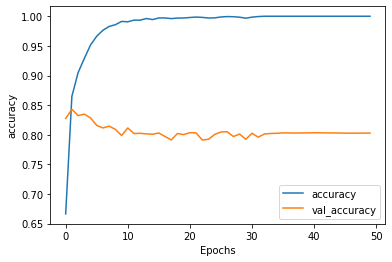

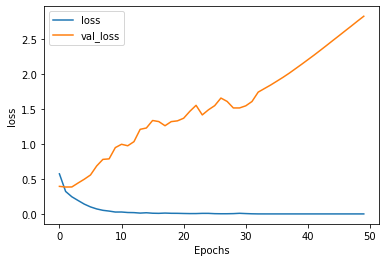

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [9]:
# Model Definition with LSTM
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50
history = model2.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 0.4310 - accuracy: 0.7978 - val_loss: 0.3496 - val_accuracy: 0.8473
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 0.2767 - accuracy: 0.8867 - val_loss: 0.3702 - val_accuracy: 0.8380
Epoch 3/50
782/782 [==============================] - 6s 7ms/step - loss: 0.2242 - accuracy: 0.9134 - val_loss: 0.3776 - val_accuracy: 0.8398
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1850 - accuracy: 0.9300 - val_loss: 0.4202 - val_accuracy: 0.8331
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1511 - accuracy: 0.9468 - val_loss: 0.4887 - val_accuracy: 0.8249
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1203 - accuracy: 0.9597 - val_loss: 0.5333 - val_accuracy: 0.8227
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 0.0968 - accuracy: 0.9687 - val_loss: 0.6227 - val_accuracy: 0.8160
Epoch 

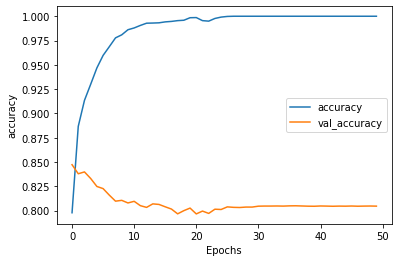

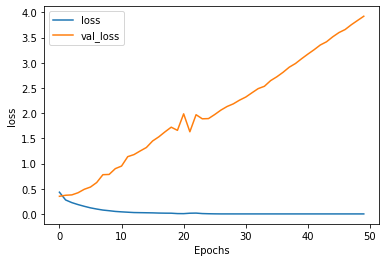

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
# Model Definition with Conv1D
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 50
history = model3.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 6s 8ms/step - loss: 0.5347 - accuracy: 0.7715 - val_loss: 0.4425 - val_accuracy: 0.8420
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.3660 - accuracy: 0.8788 - val_loss: 0.4132 - val_accuracy: 0.8412
Epoch 3/50
782/782 [==============================] - 6s 7ms/step - loss: 0.2841 - accuracy: 0.9066 - val_loss: 0.4357 - val_accuracy: 0.8369
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 0.2305 - accuracy: 0.9272 - val_loss: 0.4459 - val_accuracy: 0.8322
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1912 - accuracy: 0.9426 - val_loss: 0.4873 - val_accuracy: 0.8258
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1614 - accuracy: 0.9532 - val_loss: 0.5591 - val_accuracy: 0.8243
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1425 - accuracy: 0.9598 - val_loss: 0.5961 - val_accuracy: 0.8097
Epoch 

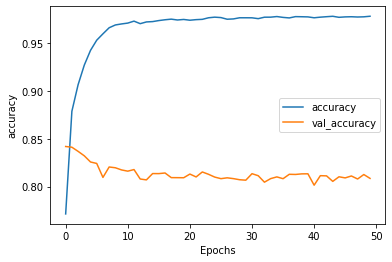

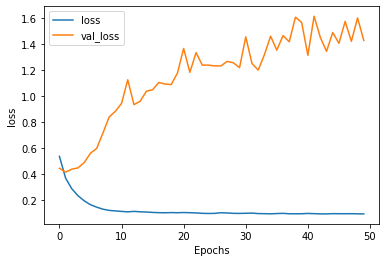

In [16]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
# Model Definition with Conv1D
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()